In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os

In [16]:
train_path = 'dataset/train/'
val_path = 'dataset/val/'

In [17]:
def sampleImg(num):
    plt.figure(figsize=(6, 6))
    fig, ax = plt.subplots(1, 2)
    img_high_res = cv2.imread(f'dataset/train/high_res/{num}.png')
    img_low_res = cv2.imread(f'dataset/train/low_res/{num}.png')
    ax[0].imshow(img_high_res)
    ax[1].imshow(img_low_res)
    ax[0].set_title(f'High Resolution Image\n{img_high_res.shape}')
    ax[1].set_title(f'Low Resolution Image\n{img_low_res.shape}')
    plt.tight_layout()
    plt.show()

<Figure size 600x600 with 0 Axes>

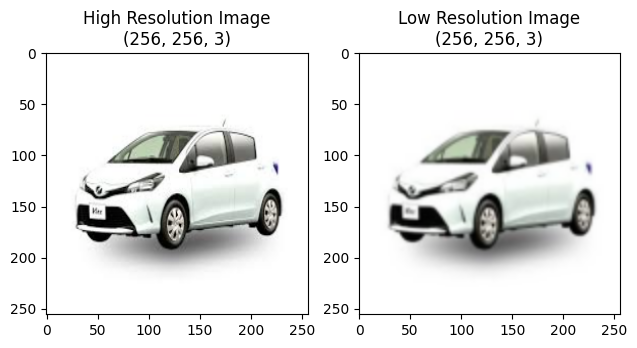

In [18]:
sampleImg(3)

In [19]:
def readImages(path):
    high_res_filenames = os.listdir(path+'/high_res/')
    low_res_filenames = os.listdir(path+'/low_res/')

    X = np.zeros((len(low_res_filenames), 256, 256, 3))
    y = np.zeros((len(high_res_filenames), 256, 256, 3))
    for i, filename in enumerate(high_res_filenames):
        y[i] = cv2.imread(path+'/high_res/'+filename)

    for i, filename in enumerate(low_res_filenames):
        X[i] = cv2.imread(path+'/low_res/'+filename)

    return X/255., y/255.

In [20]:
X_train, y_train = readImages('dataset/train')

In [21]:
X_train.shape, y_train.shape

((685, 256, 256, 3), (685, 256, 256, 3))

In [23]:
X_val, y_val = readImages('dataset/val/')

In [24]:
X_val.shape, y_val.shape

((170, 256, 256, 3), (170, 256, 256, 3))

In [25]:
with open('saved_dataset/X_train.npy', 'wb') as f:
    np.save(f, X_train)

with open('saved_dataset/y_train.npy', 'wb') as f:
    np.save(f, y_train)

with open('saved_dataset/X_val.npy', 'wb') as f:
    np.save(f, X_val)

with open('saved_dataset/y_val.npy', 'wb') as f:
    np.save(f, y_val)

